# Assignment – 1 #
## Predictive Modelling of Eating-Out Problem ##
#### Name : Kaushik Raman Jathavallabha ####
#### Student ID : u3251781
#### Prologue:
This assignment focuses on exploring, analyzing, and predicting the success of restaurants in Sydney using a dataset containing over 10,500 entries. The dataset provides detailed information on various restaurants, including their names, locations, ratings, and cuisines.

#### Data Description:
The dataset, collected from Sydney restaurants in 2018, contains the following columns:

- **address** [text]: The restaurant’s address.  
- **cost** [numeric]: Average cost for two people in AUD.  
- **cuisine** [list]: Types of cuisine served at the restaurant.  
- **lat** [numeric] and **lng** [numeric]: Latitude and longitude coordinates of the restaurant.  
- **url** [text]: The restaurant's Zomato page URL.  
- **rating_number** [numeric]: The restaurant's numerical rating.  
- **rating_text** [text]: The descriptive rating (e.g., Poor, Excellent).  
- **subzone** [text]: The suburb or area where the restaurant is located.  
- **title** [text]: The name of the restaurant.  
- **type** [list]: The type of restaurant (e.g., Casual Dining).  
- **votes** [numeric]: The number of user ratings received by the restaurant.  
- **phone** [numeric]: The restaurant’s contact phone number.  
- **groupon** [boolean]: Indicates whether the restaurant is offering promotions on groupon.com.

This dataset will be used for the various stages of analysis, model building, and deployment in this assignment.



### Part A –Importing and Understanding Data ###
    

#### Importing all Libraries ####

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast
import plotly.express as px
import plotly.io as pio

#### Importing Dataset ####

In [2]:
# Load the dataset
data = pd.read_csv('zomato_df_final_data.csv')

#### Understanding Dataset ####

In [3]:
#Shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (10500, 17)


In [59]:
#Displaying the first few rows
data.head(5)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,cleaned_subzone,cost_category
0,"371A Pitt Street, CBD, Sydney",50.0,"[Hot Pot, Korean BBQ, BBQ, Korean]",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,[Casual Dining],1311.0,False,#e15307,5.243902,#6f706b,CBD,$0-50
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"[Cafe, Coffee and Tea, Salad, Poké]",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,[Café],3236.0,False,#9c3203,7.560976,#6f706b,Alexandria,$50-100
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,[Japanese],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,[Fine Dining],1227.0,False,#7f2704,10.650407,#6f706b,Pyrmont,$100-150
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,[Modern Australian],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"[Fine Dining, Bar]",278.0,False,#7f2704,22.235772,#4186f4,Circular Quay,$250-300
4,"20 Campbell Street, Chinatown, Sydney",55.0,"[Thai, Salad]",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,[Casual Dining],2150.0,False,#a83703,5.630081,#6f706b,Chinatown,$50-100


In [5]:
# Summary
print(data.describe())

               cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  
count  10154.000000  
mean       5.332974  
std        2.147115  
min        2.000000  
25%        3.699187  
50%        4.857724  
75%        6.016260  
max       40.000000  


In [6]:
# Data types
print(data.dtypes)

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


In [7]:
# Missing Values
print(data.isnull().sum())

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


In [8]:
# For numerical columns, fill NaN with the mean
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = data[column].fillna(data[column].mean()) 

# For categorical columns, fill NaN with the most frequent value (mode)
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].fillna(data[column].mode()[0])  

In [9]:
# check again for Missing Values
print(data.isnull().sum())

address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64


### My Understanding of the Dataset ###
#### Dataset Overview: ####
- ##### 10,500 rows and 17 columns, capturing restaurant information in Sydney.
- ##### Key features: address, cost, cuisine, latitude, longitude, rating, votes, groupon, and restaurant type.
#### Missing Values Handling: ####
- ##### Numeric columns (cost, votes, etc.) were filled with mean values.
- ##### Categorical columns (type, cuisine, etc.) were filled with the most frequent value (mode).
#### Statistical Summary:
- ##### Cost: Average = $51.15, Minimum = $8, Maximum = $500.
- ##### Ratings: Range from 1.8 to 4.9; the dataset covers a broad range of quality.
- ##### Votes: Some restaurants have up to 3,236 votes, indicating popularity.
#### Data Types:
- ##### Numerical (cost, lat, lng, votes)
- ##### categorical (address, cuisine, rating text, etc.).


### 1. Provide plots/graphs to support ###

#### 1.1. How many unique cuisines are served by Sydney restaurants? ####

Total unique cuisines served by Sydney restaurants: 134


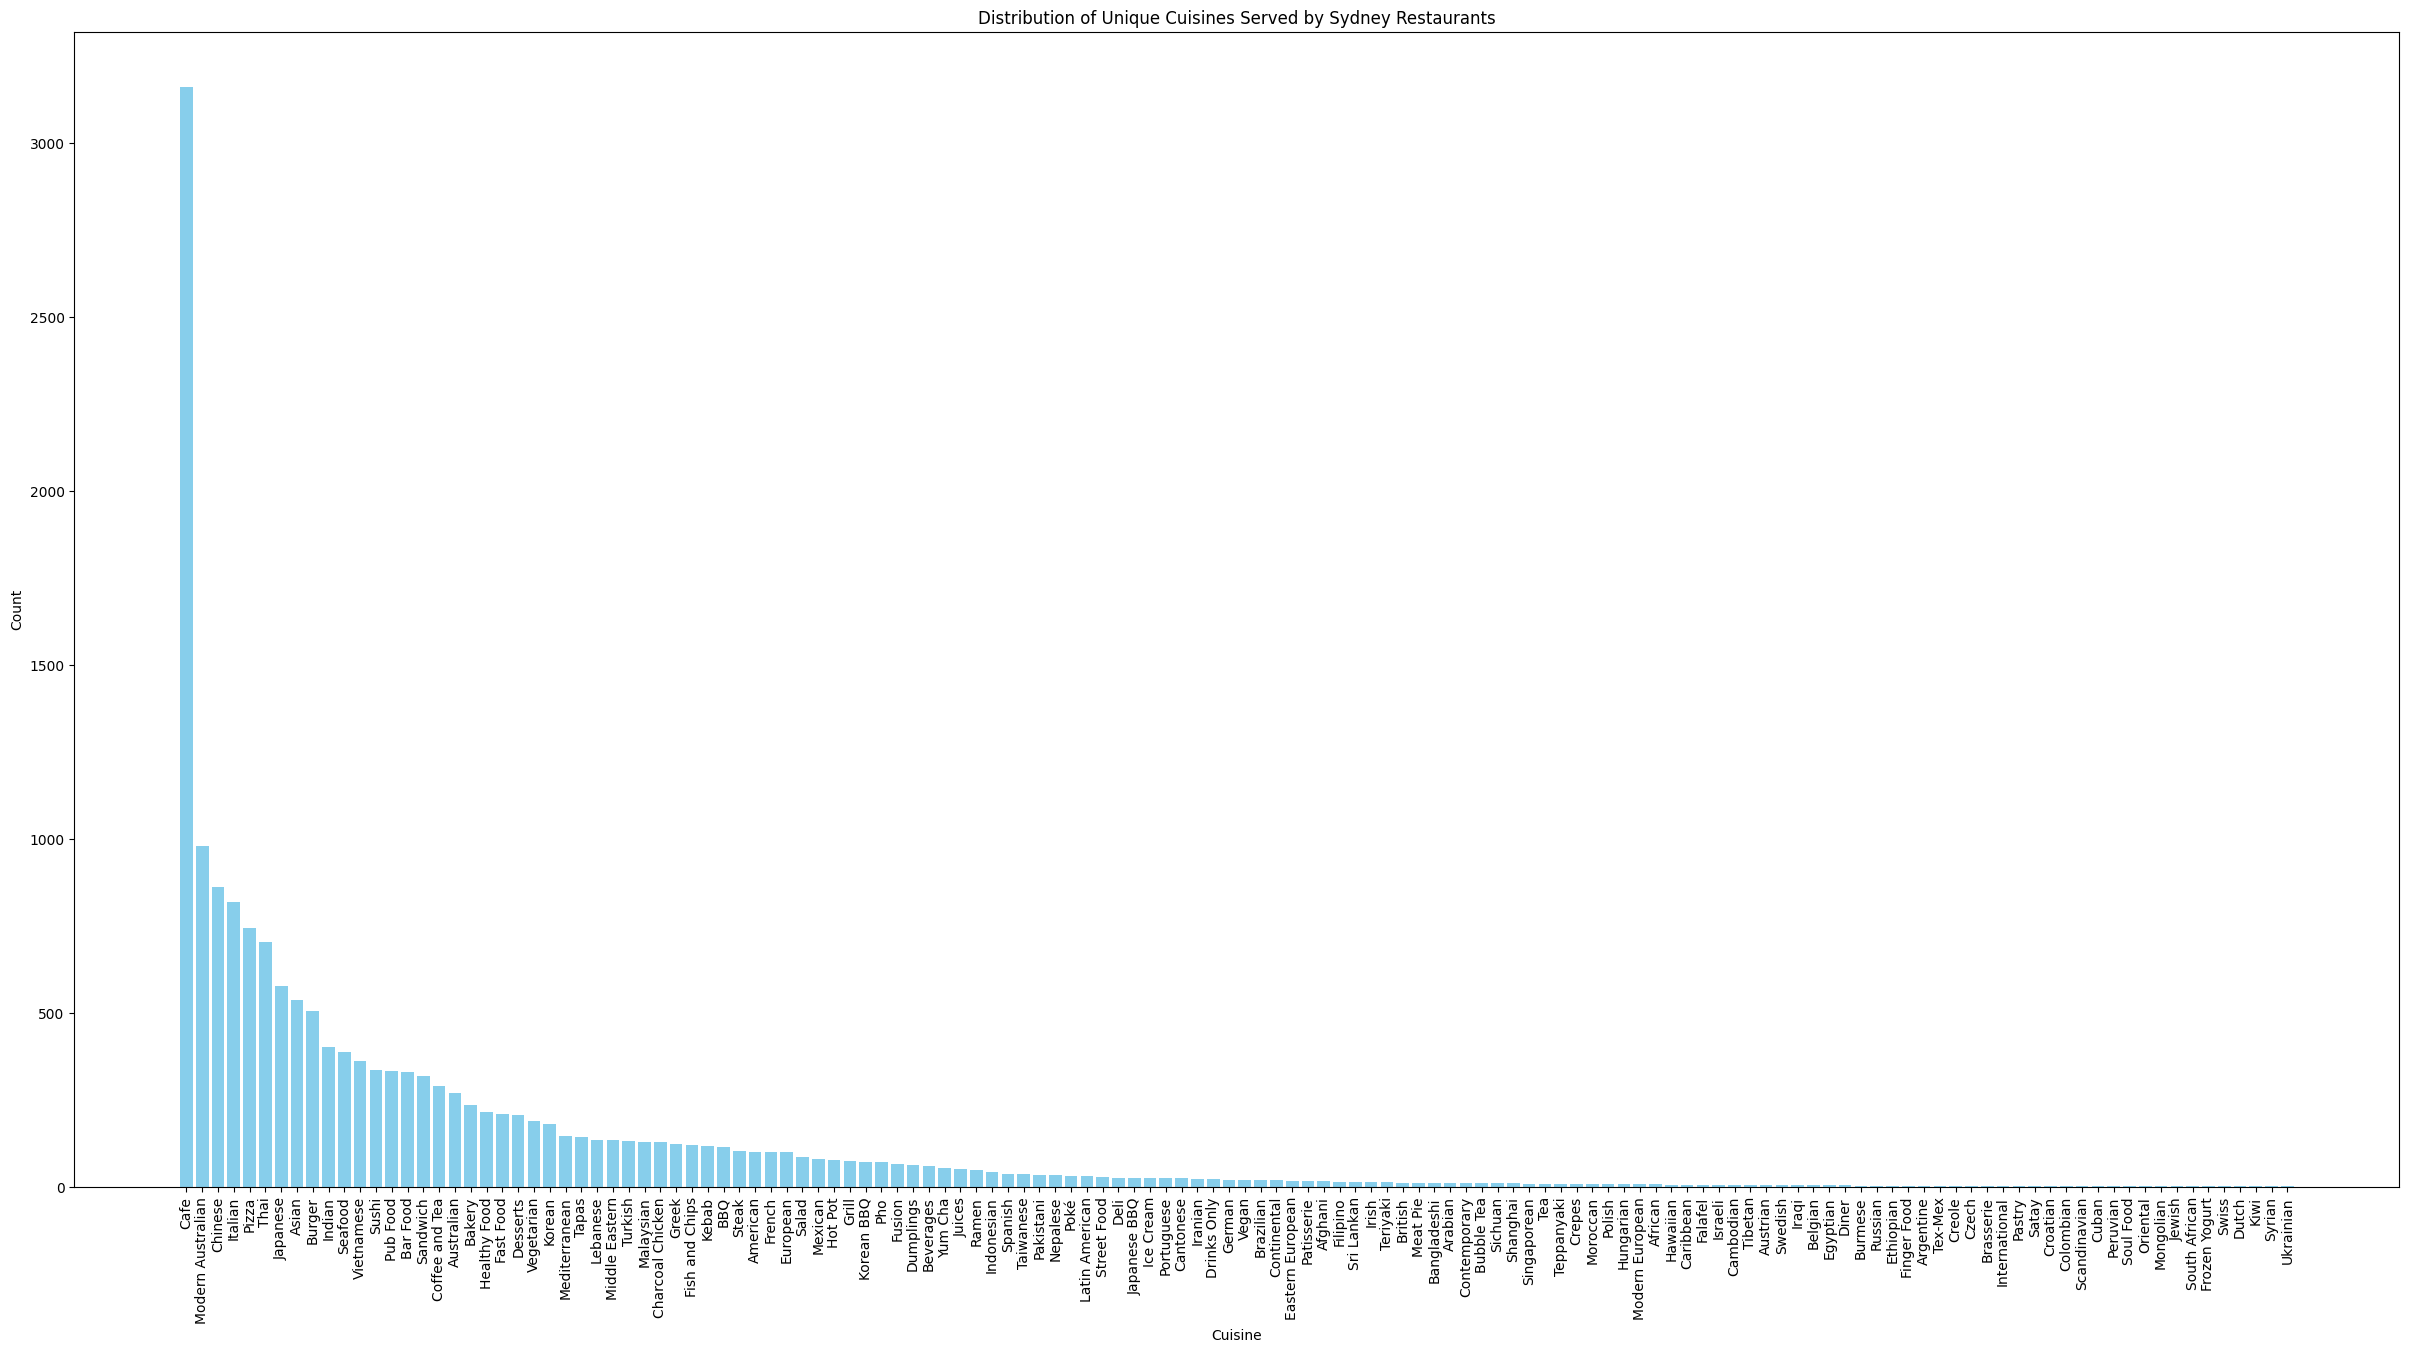

In [10]:
# cuisine column parsed as lists
data['cuisine'] = data['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten the cuisine list and find unique cuisines
unique_cuisines = set([cuisine for sublist in data['cuisine'] for cuisine in sublist])

# Output the number of unique cuisines
print(f'Total unique cuisines served by Sydney restaurants: {len(unique_cuisines)}')

# Flatten the cuisine list and count occurrences of each unique cuisine
cuisine_counts = {}
for sublist in data['cuisine']:
    if isinstance(sublist, list):
        for cuisine in sublist:
            if cuisine in cuisine_counts:
                cuisine_counts[cuisine] += 1
            else:
                cuisine_counts[cuisine] = 1

# Convert the dictionary to a data frame
cuisine_df = pd.DataFrame(list(cuisine_counts.items()), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Plot the bar chart for unique cuisines
plt.figure(figsize=(30,15))
plt.bar(cuisine_df['Cuisine'], cuisine_df['Count'], color='skyblue')
plt.xticks(rotation=90) 
plt.title('Distribution of Unique Cuisines Served by Sydney Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

#### Bar Chart: Distribution of Unique Cuisines in Sydney Restaurants ####
- Café is the leading cuisine, followed by Modern Australian and Italian.
- The chart highlights a large variety of cuisines, with 134 unique types, though many are offered by relatively few restaurants, indicating a broad but uneven distribution.


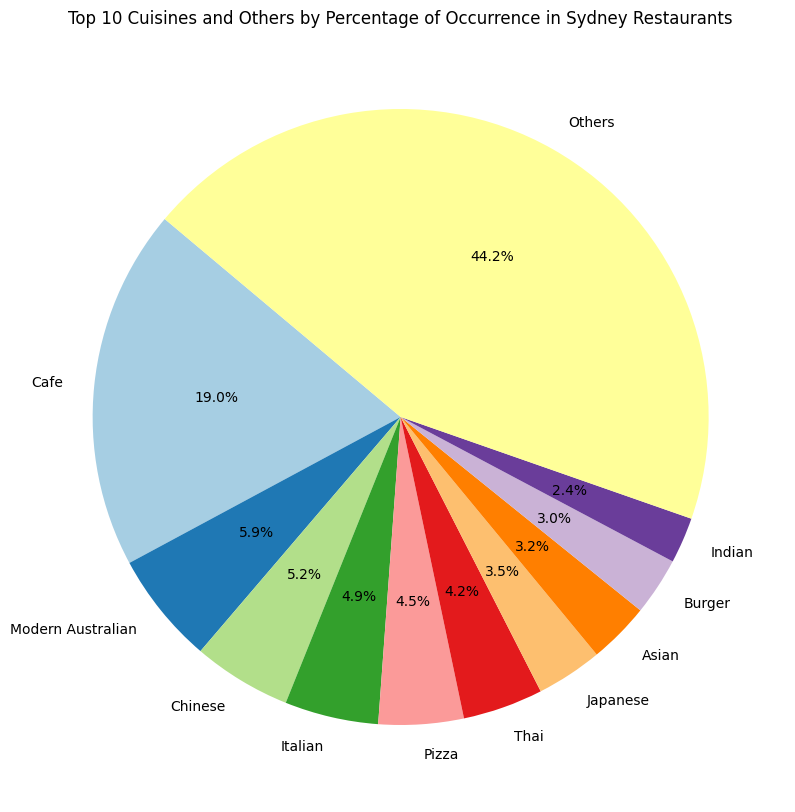

In [11]:
# Calculate the percentage of each cuisine occurrence
cuisine_df['Percentage'] = (cuisine_df['Count'] / cuisine_df['Count'].sum()) * 100

# Sort and select the top 10 cuisines
top_10_cuisines_df = cuisine_df.head(10)

# Calculate the Others category
others_percentage = cuisine_df['Percentage'][10:].sum()

# Create a DataFrame for the Others category
others_df = pd.DataFrame([{'Cuisine': 'Others', 'Percentage': others_percentage}])

# Use pd.concat() to combine top 10 cuisines with Others
top_10_cuisines_df = pd.concat([top_10_cuisines_df, others_df], ignore_index=True)

# Plot a pie chart for the top 10 cuisines and Others
plt.figure(figsize=(10, 10))
plt.pie(top_10_cuisines_df['Percentage'], labels=top_10_cuisines_df['Cuisine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Cuisines and Others by Percentage of Occurrence in Sydney Restaurants')
plt.show()


#### Pie Chart: Top 10 Cuisines and Others by Percentage
- Café takes the largest share at 19%, while Modern Australian, Chinese, and Italian each represent 5-6%.
- The "Others" category, accounting for 44.2%, reflects the diversity of less common cuisines served by smaller numbers of restaurants.

#### 1.2. which suburbs (top 3) have the highest number of restaurants? ####

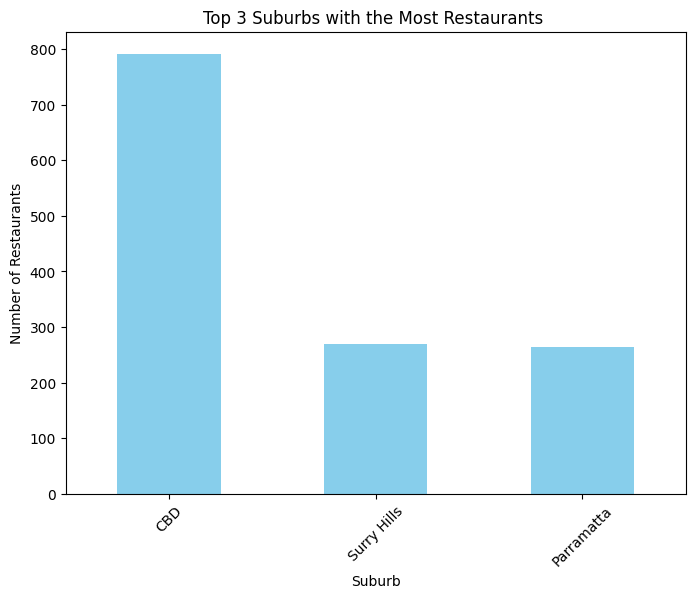

cleaned_subzone
CBD            792
Surry Hills    269
Parramatta     264
Name: count, dtype: int64


In [12]:
# Function to clean subzone names
def clean_subzone(subzone):
    # Split by comma and take the last part.
    return subzone.split(',')[-1].strip()

# Apply the cleaning function to the subzone column
data['cleaned_subzone'] = data['subzone'].apply(clean_subzone)

# Group by the cleaned_subzone to count the number of restaurants in each suburb
cleaned_suburb_counts = data['cleaned_subzone'].value_counts()

# Get the top 3 suburbs
top_3_cleaned_suburbs = cleaned_suburb_counts.head(3)

# Plot the result
plt.figure(figsize=(8, 6))
top_3_cleaned_suburbs.plot(kind='bar', color='skyblue')
plt.title('Top 3 Suburbs with the Most Restaurants ')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Display the top 3 suburbs count
print(top_3_cleaned_suburbs)


#### Top 3 Suburbs with the Most Restaurants in Sydney
- CBD has the largest number of restaurants, with 792 establishments, making it the central hub for dining in Sydney.
- Surry Hills and Parramatta follow with 269 and 264 restaurants, respectively, representing smaller but still significant dining areas.

#### 1.3. Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive” ? ####

<Figure size 1000x600 with 0 Axes>

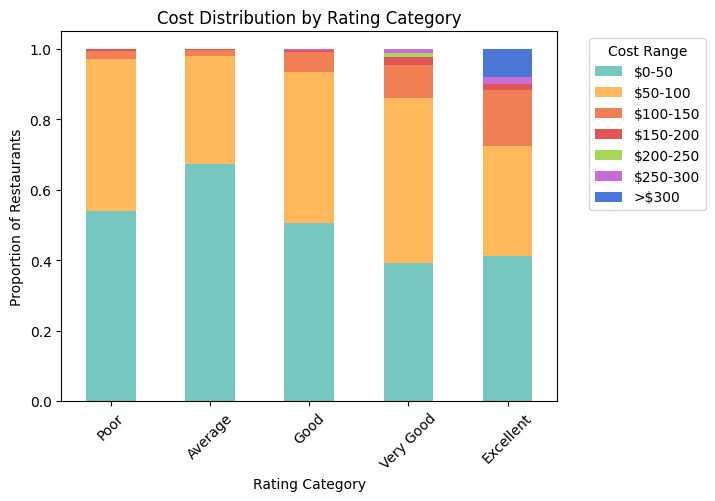

In [13]:
# Ensure the rating_text column has the correct order
rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
data['rating_text'] = pd.Categorical(data['rating_text'], categories=rating_order, ordered=True)

# Binning the cost into categories with $50 increments
bins = list(range(0, 301, 50)) + [float('inf')]  
labels = ['$0-50', '$50-100', '$100-150', '$150-200', '$200-250', '$250-300', '>$300']
data['cost_category'] = pd.cut(data['cost'], bins=bins, labels=labels)

# Create a stacked bar chart to visualize the distribution of cost categories for each rating
cost_rating_distribution = pd.crosstab(data['rating_text'], data['cost_category'], normalize='index')

# Plotting the stacked bar chart with ordered categories and $50 increments
plt.figure(figsize=(10,6))
cost_rating_distribution.plot(kind='bar', stacked=True, color=['#76c7c0', '#ffb85c', '#f07f56', '#e15554', '#a6d75b', '#c96dd6', '#4b77d6'])
plt.title('Cost Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Proportion of Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Cost Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Chart 1: Cost Distribution by Rating Category ####
- Lower-rated restaurants (Poor, Average, Good): Most restaurants in these categories fall into the 0-50 and 50-100 cost ranges. Hardly any restaurants in these categories charge more than 150. 
- Higher-rated restaurants (Very Good, Excellent): A more diverse cost range is observed, especially in the Excellent category, where restaurants charge significantly more. Costs in the 150-300 range and beyond are more common, indicating that higher ratings tend to be associated with more expensive restaurants.

##### Just Checking for Poor and Excellent ####

<Figure size 1000x600 with 0 Axes>

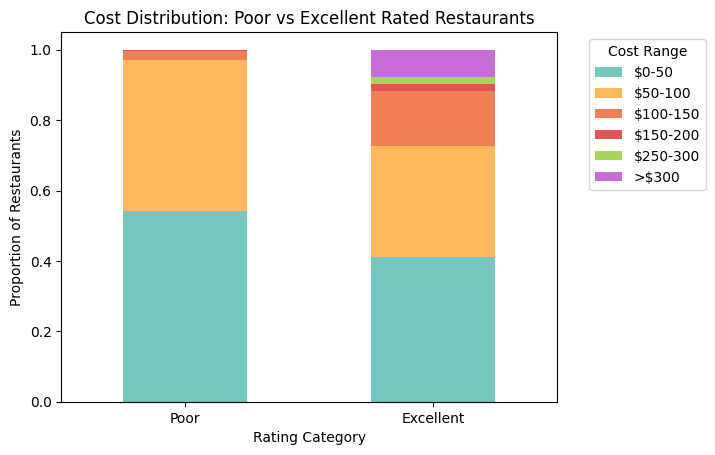

Average cost for Poor and Excellent rated restaurants:
rating_text
Poor          55.666153
Excellent    101.666667
Name: cost, dtype: float64


In [14]:
# Filter data for only Poor and Excellent ratings
rating_subset = ['Poor', 'Excellent']
filtered_data = data[data['rating_text'].isin(rating_subset)].copy() 


filtered_data['rating_text'] = filtered_data['rating_text'].astype('object')
filtered_data['rating_text'] = pd.Categorical(filtered_data['rating_text'], categories=rating_subset, ordered=True)

# Create a stacked bar chart
cost_rating_distribution_filtered = pd.crosstab(filtered_data['rating_text'], filtered_data['cost_category'], normalize='index')

# Plotting the stacked bar chart
plt.figure(figsize=(10,6))
cost_rating_distribution_filtered.plot(kind='bar', stacked=True, color=['#76c7c0', '#ffb85c', '#f07f56', '#e15554', '#a6d75b', '#c96dd6', '#4b77d6'])
plt.title('Cost Distribution: Poor vs Excellent Rated Restaurants')
plt.xlabel('Rating Category')
plt.ylabel('Proportion of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Cost Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Numerical Evidence: Average cost for Poor and Excellent rated restaurants
avg_cost_by_rating_filtered = filtered_data.groupby('rating_text', observed=True)['cost'].mean()

# Print the average costs for each rating
print('Average cost for Poor and Excellent rated restaurants:')
print(avg_cost_by_rating_filtered)


#### Chart 2: Cost Distribution: Poor vs Excellent Rated Restaurants
- Poor-rated restaurants: Primarily fall into the 0-50 and 50-100 cost ranges. Very few are expensive.
- Excellent-rated restaurants: Show a wider cost range, with a significant portion in the 100-150 range and some even beyond 300.
#### Conclusion (with Numerical Evidence):
Restaurants with Excellent ratings tend to be more expensive, with an average cost of 101.67 compared to 55.67 for Poor rated restaurants.

## 2. Explotoary Data Analasis. ##

#### 2.1. Cost Analysis ####

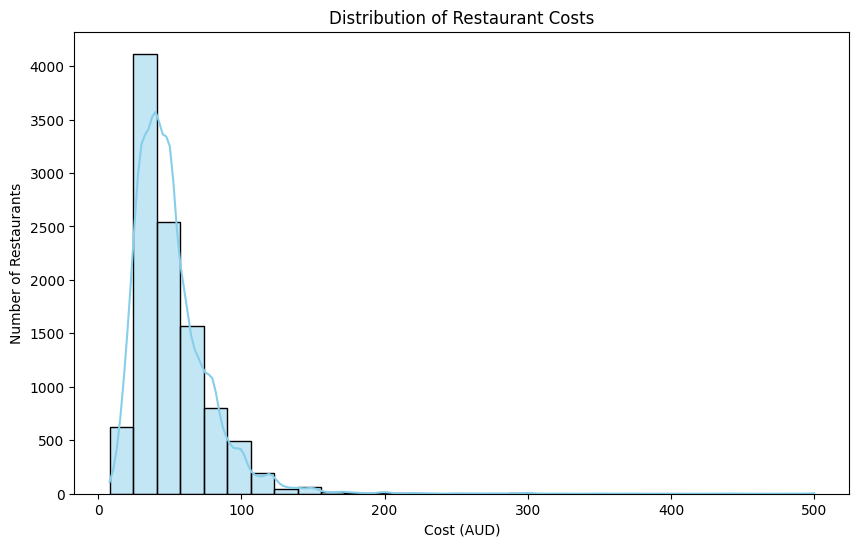

Cost Descriptive Statistics:
count    10500.000000
mean        51.153240
std         27.337574
min          8.000000
25%         35.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


In [15]:

# Plot histogram for the distribution of restaurant costs
plt.figure(figsize=(10,6))
sns.histplot(data['cost'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost (AUD)')
plt.ylabel('Number of Restaurants')
plt.show()

# Descriptive statistics for cost
cost_stats = data['cost'].describe()
print('Cost Descriptive Statistics:')
print(cost_stats)




#### Distribution of Restaurant Costs:
- The histogram shows that most restaurants in the dataset charge between 0-100 AUD, with a sharp decline beyond this range.
- The majority of restaurants have costs concentrated around 30-60 AUD, with very few restaurants exceeding 100 AUD.
- The curve suggests a right-skewed distribution, indicating that while most restaurants are affordable, there are a few outliers with higher costs.

#### 2.2. Rating Analysis ####

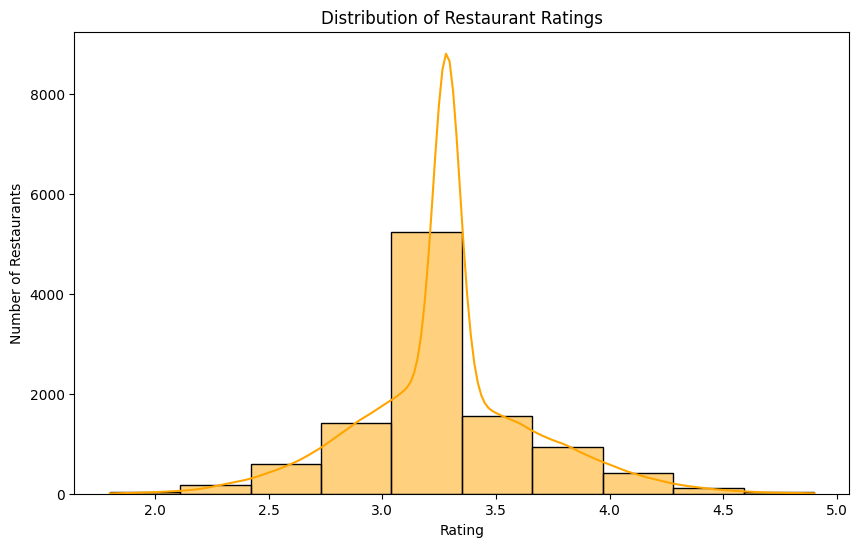

Rating Descriptive Statistics:
count    10500.000000
mean         3.283672
std          0.376001
min          1.800000
25%          3.100000
50%          3.283672
75%          3.400000
max          4.900000
Name: rating_number, dtype: float64


In [16]:

# Plot histogram for the distribution of restaurant ratings
plt.figure(figsize=(10,6))
sns.histplot(data['rating_number'], bins=10, kde=True, color='orange')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Descriptive statistics for rating
rating_stats = data['rating_number'].describe()
print('Rating Descriptive Statistics:')
print(rating_stats)

#### Distribution of Restaurant Ratings:
- The histogram shows that most restaurant ratings fall between 3.0 and 3.6. The distribution is somewhat bell-shaped, centered around the 3.0-3.5 range.
- Few restaurants are rated below 2.5 or above 4.0, indicating that extreme ratings (either low or high) are relatively rare.

#### 2.3. Type Analysis ###

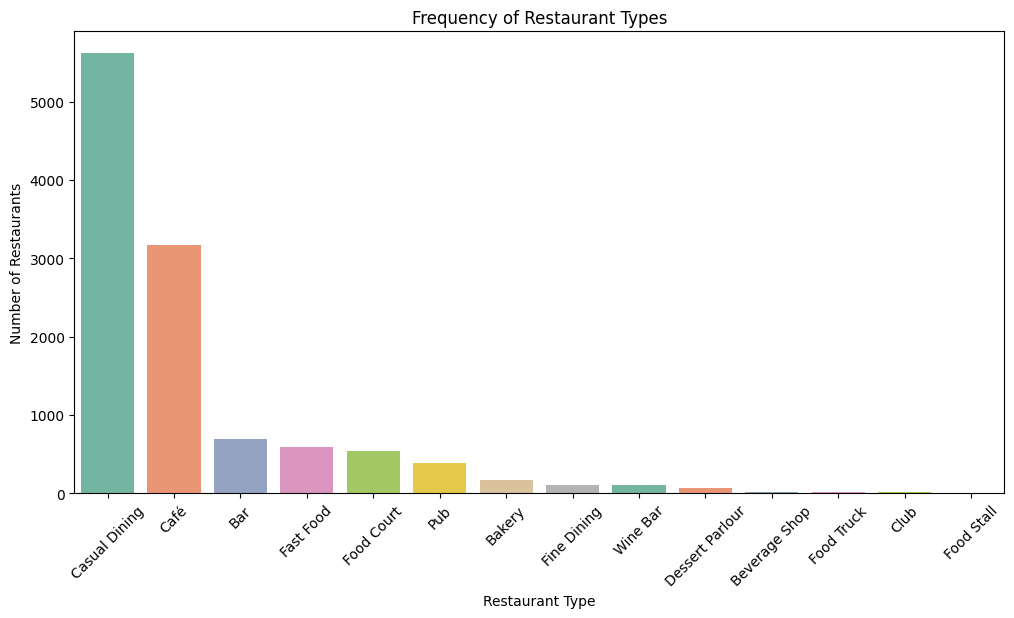

Top restaurant types:
Casual Dining      5614
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64


In [17]:

# Safely convert type column entries to lists 
def safe_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)  
        except (ValueError, SyntaxError):
            return x
    return x

# Apply the safe_eval function to the type column
data['type'] = data['type'].apply(safe_eval)

# Filter out non-list values and flatten the type column to count the frequency of each restaurant type
flattened_types = [t for sublist in data['type'] if isinstance(sublist, list) for t in sublist]

# Create a DataFrame for type counts
type_counts = pd.Series(flattened_types).value_counts()

# Plot a bar chart for restaurant types
plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2', dodge=False, legend=False)
plt.title('Frequency of Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Print the top restaurant types
print('Top restaurant types:')
print(type_counts)


#### Frequency of Restaurant Types:
- Casual Dining is by far the most common restaurant type, with 5,566 restaurants.
- Cafés are the second most common, with 3,169 establishments.
- Other restaurant types, like Bars (692) and Fast Food (588), appear in smaller numbers, while types like Fine Dining (113) and Wine Bars (106) are much rarer.
- Food Stalls and Clubs are the least common types, with only a handful of establishments

#### 2.4. Cost vs Rating ####

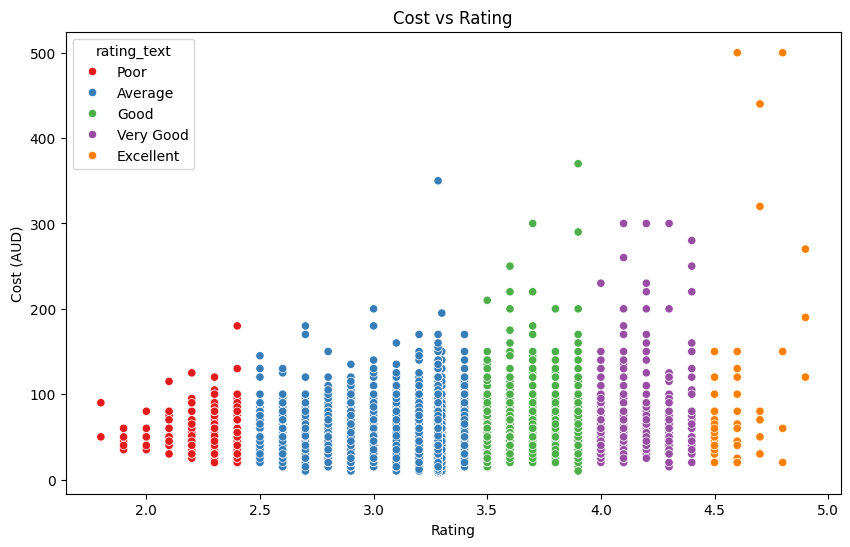

In [18]:
# Scatter plot for cost vs rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='rating_number', y='cost', data=data, hue='rating_text', palette='Set1')
plt.title('Cost vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cost (AUD)')
plt.show()


#### Scatter Plot Insights:
- Higher-rated restaurants (Very Good, Excellent) tend to be more expensive, with costs extending well beyond 100 AUD, and some reaching 500 AUD.
Lower-rated restaurants (Poor, Average) generally fall into the 0-100 AUD range, with very few exceeding 100 AUD.
- As the rating increases, there is a noticeable upward trend in cost, especially for restaurants rated 4.0 and above.

#### 2.5. Type distrubution by Rating ####

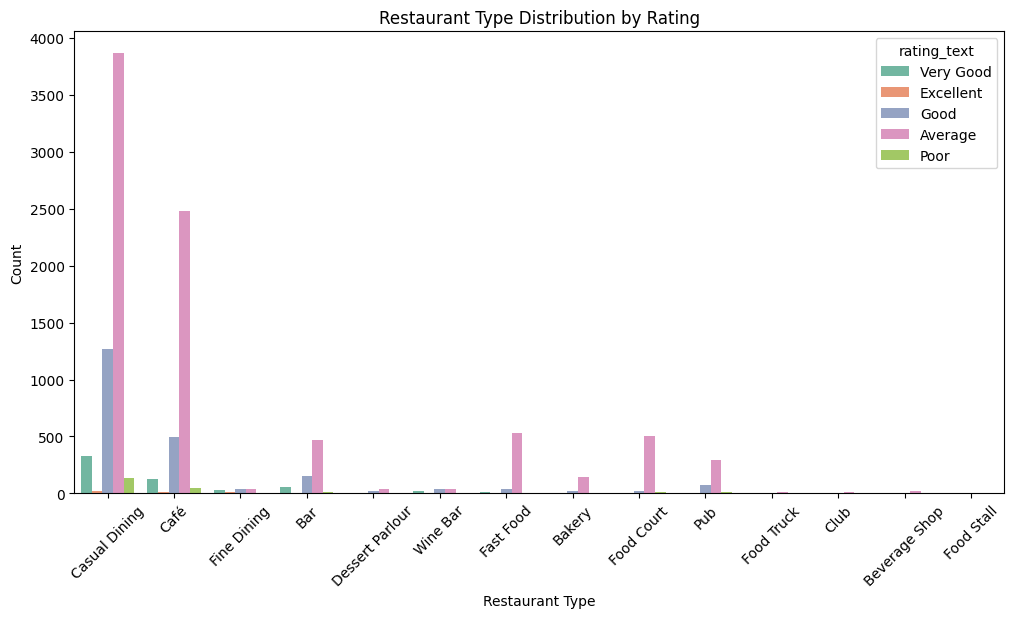

In [19]:
def safe_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return x
    return x

# Apply the safe_eval function to type column
data['type'] = data['type'].apply(safe_eval)

# Flatten the 'type' column and create a DataFrame that matches each type with its corresponding rating
rows = []
for idx, row in data.iterrows():
    if isinstance(row['type'], list):  
        for t in row['type']:
            rows.append({'type': t, 'rating_text': row['rating_text']})

# Create a DataFrame from the rows
type_rating_df = pd.DataFrame(rows)

# create the countplot 
plt.figure(figsize=(12,6))
sns.countplot(x='type', hue='rating_text', data=type_rating_df, palette='Set2')
plt.title('Restaurant Type Distribution by Rating')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Key Insights:
- The countplot displays the distribution of restaurant types across different rating categories (Poor, Average, Good, Very Good, Excellent).
- Casual Dining and Cafés dominate across all rating categories, with a higher number of restaurants rated as Good, Very Good, or Excellent.
- Bars and Fast Food establishments tend to receive lower ratings (Poor and Average) more frequently than fine dining or cafés.
- Fine Dining restaurants, while less frequent overall, tend to receive Very Good or Excellent ratings more often compared to other types like Fast Food or Food Courts.

## 3. Produce a Densicy Map ##

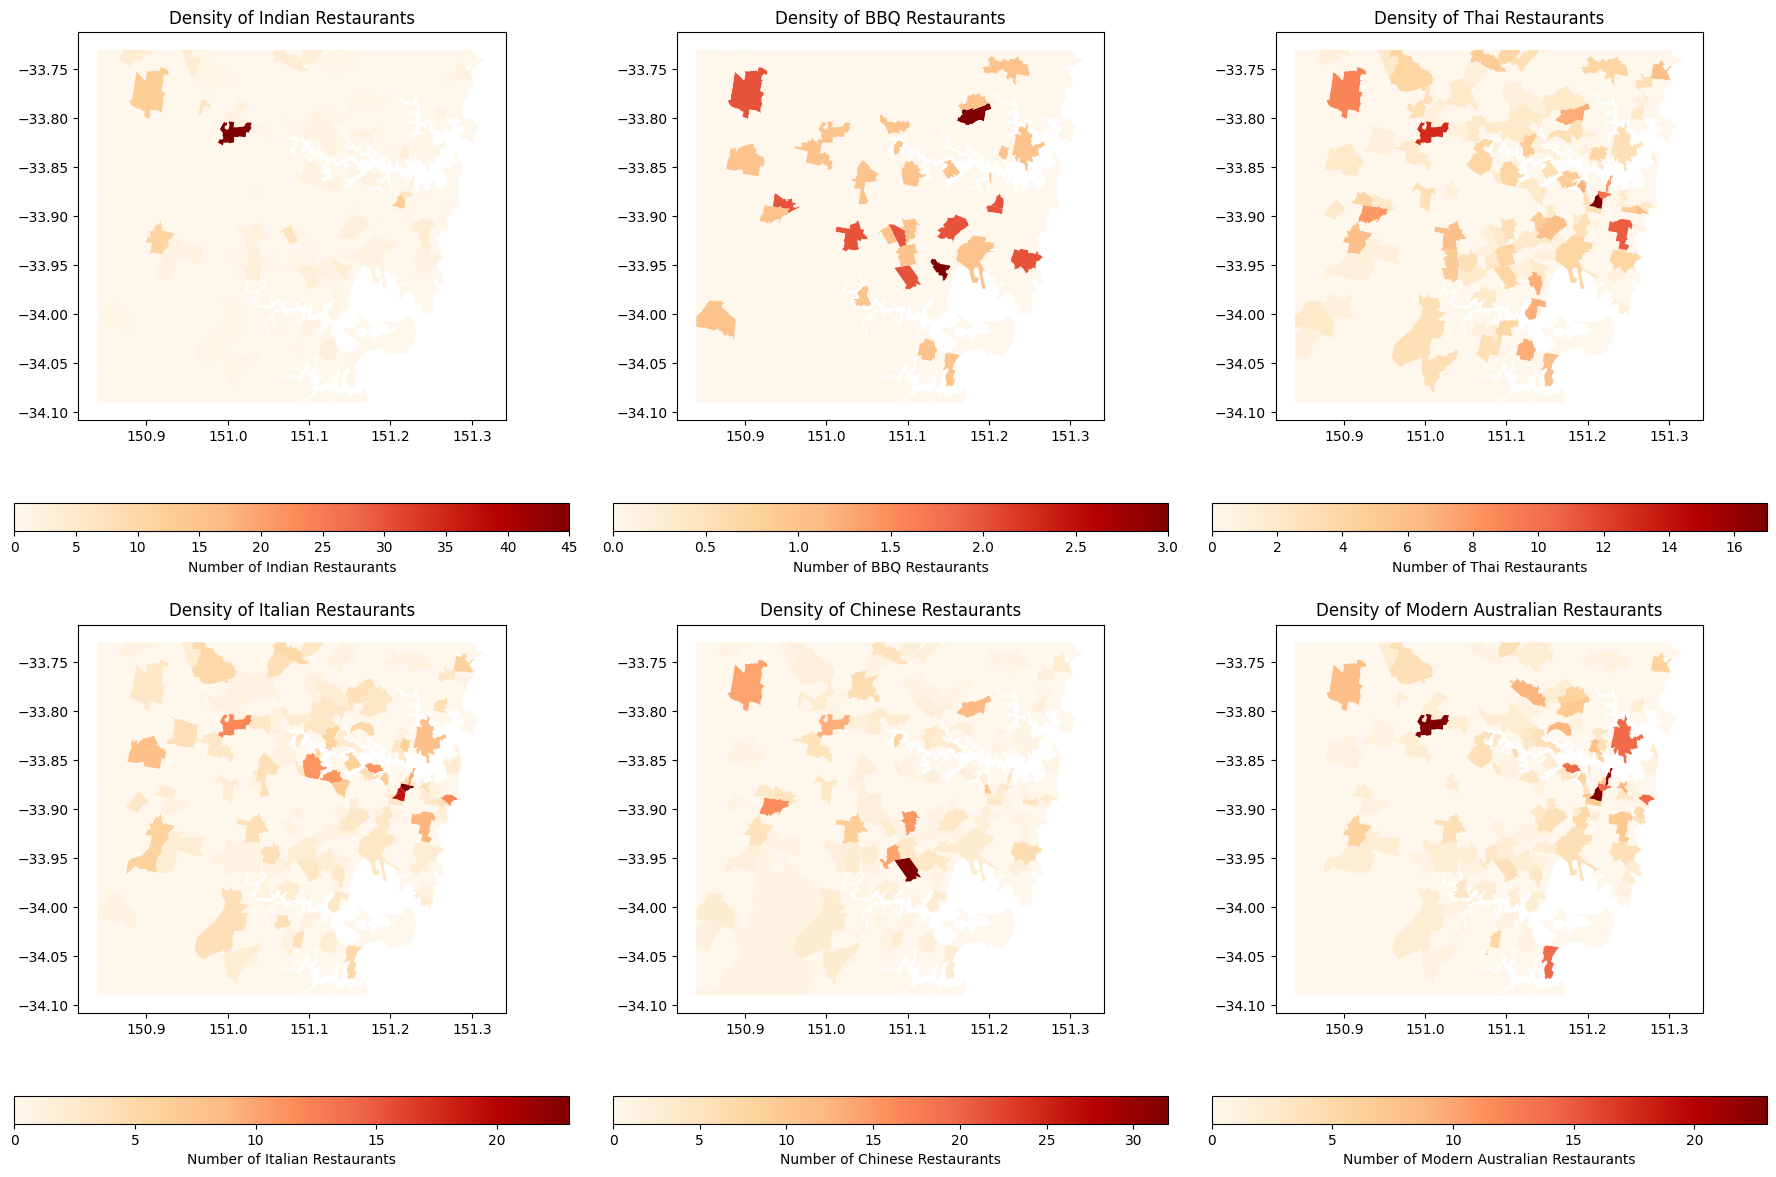

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

sydney_map = gpd.read_file("sydney.geojson")

# Create a function to plot the density map for multiple cuisines
def plot_top_cuisines_density(sydney_map, data, cuisines):
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    
    # Flatten the axes array for easy indexing
    axes = axes.flatten()
    
    # Iterate over the top cuisines and plot each one
    for i, cuisine in enumerate(cuisines):
        # Create a subset of restaurants that serve the selected cuisine
        cuisine_subset = data[data['cuisine'].apply(lambda c: cuisine in c if isinstance(c, list) else False)]
        
        # Group by subzone to count the number of restaurants serving the selected cuisine in each suburb
        cuisine_count = cuisine_subset.groupby('subzone').size().reset_index(name='count')
        
        # Use a copy of sydney_map to avoid modifying it during each loop iteration
        sydney_map_copy = sydney_map.copy()
        
        # Merge the cuisine count data with the geojson data 
        sydney_map_copy = sydney_map_copy.merge(cuisine_count, left_on='SSC_NAME', right_on='subzone', how='left')
        
        # Replace NaN values with 0 (suburbs with no restaurants serving the selected cuisine)
        sydney_map_copy['count'] = sydney_map_copy['count'].fillna(0)
        
        # Plot the cuisine density map on the current subplot
        sydney_map_copy.plot(column='count', cmap='OrRd', ax=axes[i], legend=True, 
                             legend_kwds={'label': f'Number of {cuisine} Restaurants', 'orientation': 'horizontal'})
        
        axes[i].set_title(f'Density of {cuisine} Restaurants')
    
    plt.tight_layout()
    plt.show()

# Example usage
top_6_cuisines = ['Indian', 'BBQ', 'Thai', 'Italian', 'Chinese', 'Modern Australian']
plot_top_cuisines_density(sydney_map, data, top_6_cuisines)


## 4. Interactive Plotting ##

In [37]:
# Create an interactive bar plot with Plotly
pio.renderers.default = 'browser'  
fig = px.bar(cuisine_df, x='Cuisine', y='Count', title='Distribution of Unique Cuisines Served by Sydney Restaurants')

# Customize layout for better interactivity
fig.update_layout(
    xaxis_title="Cuisine",
    yaxis_title="Count",
    xaxis_tickangle=-45,  # Rotate the x-axis labels for readability
    hovermode='x unified',  # Show tooltips on hover
    showlegend=False  # Disable legend (optional for bar charts)
)

# Show the interactive plot
fig.show()

#### Intractive Plotting
- Helps users immerse themself in the visulization created
- Hower over plots to see a more accurate information.